+ 연관규칙 학습 : 대형 DB에서 변수 간의 흥미로운 관계를 발견하기 위한 규칙-기반 기계학습 방법
  + ex) {양파, 감자} $\rightarrow$ {버거}
  + 특징
    1) 프로모션 가격, 제품 배치, 묶음 할인 같은 마켓팅 활동에 관한 결정을 위한 기초자료로 사용될 수 있다.
    2) 일반적으로 트랜잭션 내에서 또는 트랜잭션 전반에서 항목의 순서는 고려하지 않는다.
    
+ 지지도(support) = $P(X \cup Y)$
  + 전체 구매건수 가운데 상품 X와 Y를 동시에 구매한 비율
+ 신뢰도(confidence) = $P(Y|X) = \frac {P(X \cup Y)} {P(X)} = \frac {support} {P(X)}$
  + 상품 X를 구매한 건수 가운데 Y도 같이 구매한 비율
+ 향상도(lift) = $\frac {P(Y|X)} {P(Y)} = \frac {P(X \cup Y)} {P(X)P(Y)} = \frac {confidence} {P(Y)}$
  + 전체에서 상품 Y를 구매한 비율에 비해 X를 구매한 고객이 Y를 구매한 비율이 몇 배인가
  + ex) lift = 3 : 전체 중 Y를 구매한 비율보다 X를 구매한 고객이 Y를 구매한 비율이 3배 높다.
    + 따라서 Y를 팔기 위해선 X를 구매한 고객을 기준으로 집중 마켓팅하면 상품이 더 잘 팔릴 것이다.
  
+ 알고리즘
  (a) Apriori 알고리즘 : 최소지지도 이상을 갖는 항목집합인 빈발항목집합을 추출하는 방법
    + 규칙1 : 한 항목집합이 빈발하다면 이 항목집합의 모든 부분집합은 역시 빈발항목집합이다.
    + 규칙2 : 한 항목집합이 비빈발하다면 이 항목집합을 포함하는 모든 집합은 비빈발항목집합이다.

  (b) FP-성장 알고리즘 : 후보 빈발항목집합 생성 없이 FP-Tree를 이용하여 빈발항목집합을 추출하기 위해 고안된 방법
    + 불필요한 후보 빈발항목집합을 생성하지 않음으로써, Apriori 알고리즘보다 빠르게 빈발항목집합을 추출할 수 있음

## 예제 1. Apriori 알고리즘, apriori{arules}

In [1]:
data(Titanic)
titan.df = as.data.frame(Titanic)
head(titan.df)

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


In [2]:
sum(table(titan.df))
summary(titan.df)

[1] 32

  Class       Sex        Age     Survived      Freq       
 1st :8   Male  :16   Child:16   No :16   Min.   :  0.00  
 2nd :8   Female:16   Adult:16   Yes:16   1st Qu.:  0.75  
 3rd :8                                   Median : 13.50  
 Crew:8                                   Mean   : 68.78  
                                          3rd Qu.: 77.00  
                                          Max.   :670.00  

In [3]:
# 자료 형식변환
titanic = NULL
for(i in 1:4){
  titanic = cbind(titanic, rep(as.character(titan.df[, i]), titan.df$Freq))
}
titanic = as.data.frame(titanic)
names(titanic) = names(titan.df)[1:4]
head(titanic)
tail(titanic)

,Class,Sex,Age,Survived
,<chr>,<chr>,<chr>,<chr>
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No
6,3rd,Male,Child,No


,Class,Sex,Age,Survived
,<chr>,<chr>,<chr>,<chr>
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes
2200,Crew,Female,Adult,Yes
2201,Crew,Female,Adult,Yes


In [4]:
sum(table(titanic))
summary(titanic)

[1] 2201

    Class               Sex                Age              Survived        
 Length:2201        Length:2201        Length:2201        Length:2201       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

In [5]:
# 연관규칙 분석
install.packages("arules")
library(arules)
rules.all = apriori(titanic)  # 모든 규칙 생성
options(digits = 3)
inspect(rules.all)  # 저장된 규칙 출력

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Warning message:
“Column(s) 1, 2, 3, 4 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 220 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [27 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                                     rhs           support confidence
[1]  {}                                   => {Age=Adult}   0.950   0.950     
[2]  {Class=2nd}                          => {Age=Adult}   0.119   0.916     
[3]  {Class=1st}                          => {Age=Adul

+ 결과 해석(X : lhs, Y : rhs)

  1) support 0.950 : 전체에서 adult의 비율

  2) confidence 0.916 : 2등급에서 adult의 비율
  
  3) lift 1.033 : 전체 중 어른의 비율보다 1등석에서 어른의 비율이 더 크다

In [6]:
# Y제한(survived)
# 설정값 변경 : 최소부분집합크기 = 2, 최소지지도 = 0.005, 최소신뢰도 = 0.8
rules = apriori(titanic, control = list(verbose = F),
                parameter = list(minlen = 2, supp = 0.005, conf = 0.8),
                appearance = list(rhs = c("Survived=No", "Survived=Yes"),
                                  default = "lhs"))
rules.sorted = sort(rules, by = "lift")  # 향상도 기준으로 정렬
inspect(rules.sorted)  # 중복되는 규칙이 존재함

Warning message:
“Column(s) 1, 2, 3, 4 not logical or factor. Applying default discretization (see '? discretizeDF').”


     lhs                                    rhs            support confidence
[1]  {Class=2nd, Age=Child}              => {Survived=Yes} 0.01090 1.000     
[2]  {Class=2nd, Sex=Female, Age=Child}  => {Survived=Yes} 0.00591 1.000     
[3]  {Class=1st, Sex=Female}             => {Survived=Yes} 0.06406 0.972     
[4]  {Class=1st, Sex=Female, Age=Adult}  => {Survived=Yes} 0.06361 0.972     
[5]  {Class=2nd, Sex=Female}             => {Survived=Yes} 0.04225 0.877     
[6]  {Class=Crew, Sex=Female}            => {Survived=Yes} 0.00909 0.870     
[7]  {Class=Crew, Sex=Female, Age=Adult} => {Survived=Yes} 0.00909 0.870     
[8]  {Class=2nd, Sex=Female, Age=Adult}  => {Survived=Yes} 0.03635 0.860     
[9]  {Class=2nd, Sex=Male, Age=Adult}    => {Survived=No}  0.06997 0.917     
[10] {Class=2nd, Sex=Male}               => {Survived=No}  0.06997 0.860     
[11] {Class=3rd, Sex=Male, Age=Adult}    => {Survived=No}  0.17583 0.838     
[12] {Class=3rd, Sex=Male}               => {Survived=No}  0.191

In [7]:
# 중복되는 규칙
subset.matrix = is.subset(rules.sorted, rules.sorted)
subset.matrix
subset.matrix[lower.tri(subset.matrix, diag = T)] <- FALSE  # 상삼각행렬
subset.matrix
redundant <- colSums(subset.matrix, na.rm = T) >= 1  # 열의 합 계산
redundant
which(redundant)  # 데이터 위치(index) 확인

rules.pruned = rules.sorted[!redundant]  # 중복 제거
rules.pruned

  [[ suppressing 12 column names ‘{Class=2nd,Age=Child,Survived=Yes}’, ‘{Class=2nd,Sex=Female,Age=Child,Survived=Yes}’, ‘{Class=1st,Sex=Female,Survived=Yes}’ ... ]]



12 x 12 sparse Matrix of class "ngCMatrix"
                                                                      
{Class=2nd,Age=Child,Survived=Yes}             | | . . . . . . . . . .
{Class=2nd,Sex=Female,Age=Child,Survived=Yes}  . | . . . . . . . . . .
{Class=1st,Sex=Female,Survived=Yes}            . . | | . . . . . . . .
{Class=1st,Sex=Female,Age=Adult,Survived=Yes}  . . . | . . . . . . . .
{Class=2nd,Sex=Female,Survived=Yes}            . | . . | . . | . . . .
{Class=Crew,Sex=Female,Survived=Yes}           . . . . . | | . . . . .
{Class=Crew,Sex=Female,Age=Adult,Survived=Yes} . . . . . . | . . . . .
{Class=2nd,Sex=Female,Age=Adult,Survived=Yes}  . . . . . . . | . . . .
{Class=2nd,Sex=Male,Age=Adult,Survived=No}     . . . . . . . . | . . .
{Class=2nd,Sex=Male,Survived=No}               . . . . . . . . | | . .
{Class=3rd,Sex=Male,Age=Adult,Survived=No}     . . . . . . . . . . | .
{Class=3rd,Sex=Male,Survived=No}               . . . . . . . . . . | |

  [[ suppressing 12 column names ‘{Class=2nd,Age=Child,Survived=Yes}’, ‘{Class=2nd,Sex=Female,Age=Child,Survived=Yes}’, ‘{Class=1st,Sex=Female,Survived=Yes}’ ... ]]



12 x 12 sparse Matrix of class "ngCMatrix"
                                                                      
{Class=2nd,Age=Child,Survived=Yes}             . | . . . . . . . . . .
{Class=2nd,Sex=Female,Age=Child,Survived=Yes}  . . . . . . . . . . . .
{Class=1st,Sex=Female,Survived=Yes}            . . . | . . . . . . . .
{Class=1st,Sex=Female,Age=Adult,Survived=Yes}  . . . . . . . . . . . .
{Class=2nd,Sex=Female,Survived=Yes}            . . . . . . . | . . . .
{Class=Crew,Sex=Female,Survived=Yes}           . . . . . . | . . . . .
{Class=Crew,Sex=Female,Age=Adult,Survived=Yes} . . . . . . . . . . . .
{Class=2nd,Sex=Female,Age=Adult,Survived=Yes}  . . . . . . . . . . . .
{Class=2nd,Sex=Male,Age=Adult,Survived=No}     . . . . . . . . . . . .
{Class=2nd,Sex=Male,Survived=No}               . . . . . . . . . . . .
{Class=3rd,Sex=Male,Age=Adult,Survived=No}     . . . . . . . . . . . .
{Class=3rd,Sex=Male,Survived=No}               . . . . . . . . . . . .

{Class=2nd,Age=Child,Survived=Yes} 
                                         FALSE 
 {Class=2nd,Sex=Female,Age=Child,Survived=Yes} 
                                          TRUE 
           {Class=1st,Sex=Female,Survived=Yes} 
                                         FALSE 
 {Class=1st,Sex=Female,Age=Adult,Survived=Yes} 
                                          TRUE 
           {Class=2nd,Sex=Female,Survived=Yes} 
                                         FALSE 
          {Class=Crew,Sex=Female,Survived=Yes} 
                                         FALSE 
{Class=Crew,Sex=Female,Age=Adult,Survived=Yes} 
                                          TRUE 
 {Class=2nd,Sex=Female,Age=Adult,Survived=Yes} 
                                          TRUE 
    {Class=2nd,Sex=Male,Age=Adult,Survived=No} 
                                         FALSE 
              {Class=2nd,Sex=Male,Survived=No} 
                                         FALSE 
    {Class=3rd,Sex=Male,Age=Adult,Survived=No} 
                                         FALSE 
              {Class=3rd,Sex=Male,Survived=No} 
                                         FALSE

{Class=2nd,Sex=Female,Age=Child,Survived=Yes} 
                                             2 
 {Class=1st,Sex=Female,Age=Adult,Survived=Yes} 
                                             4 
{Class=Crew,Sex=Female,Age=Adult,Survived=Yes} 
                                             7 
 {Class=2nd,Sex=Female,Age=Adult,Survived=Yes} 
                                             8

set of 8 rules 

In [8]:
# 시각화
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘ca’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



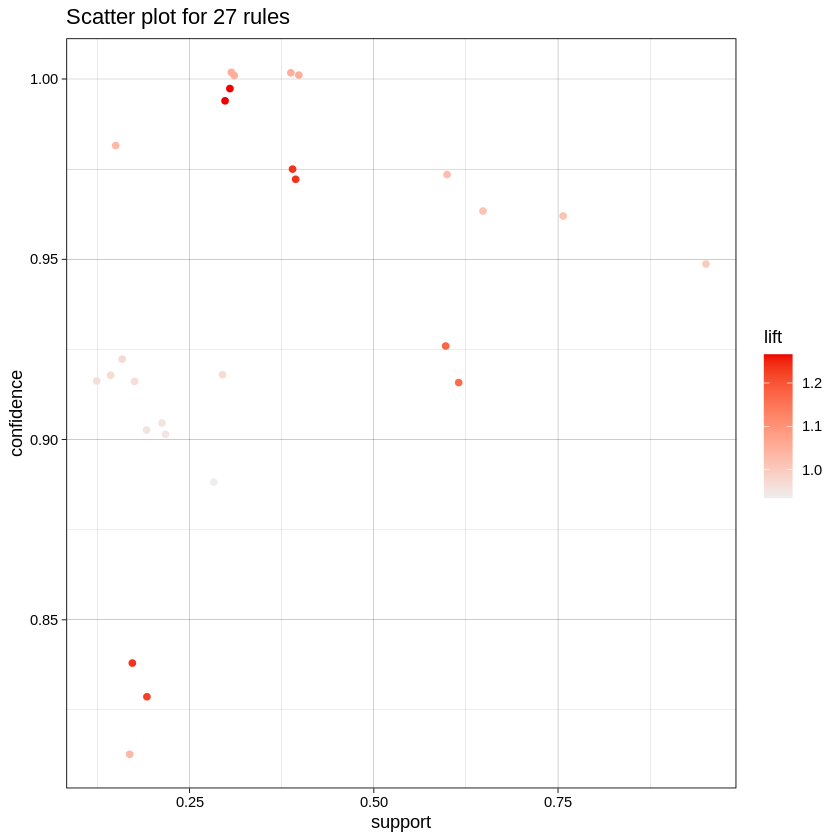

In [10]:
plot(rules.all)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



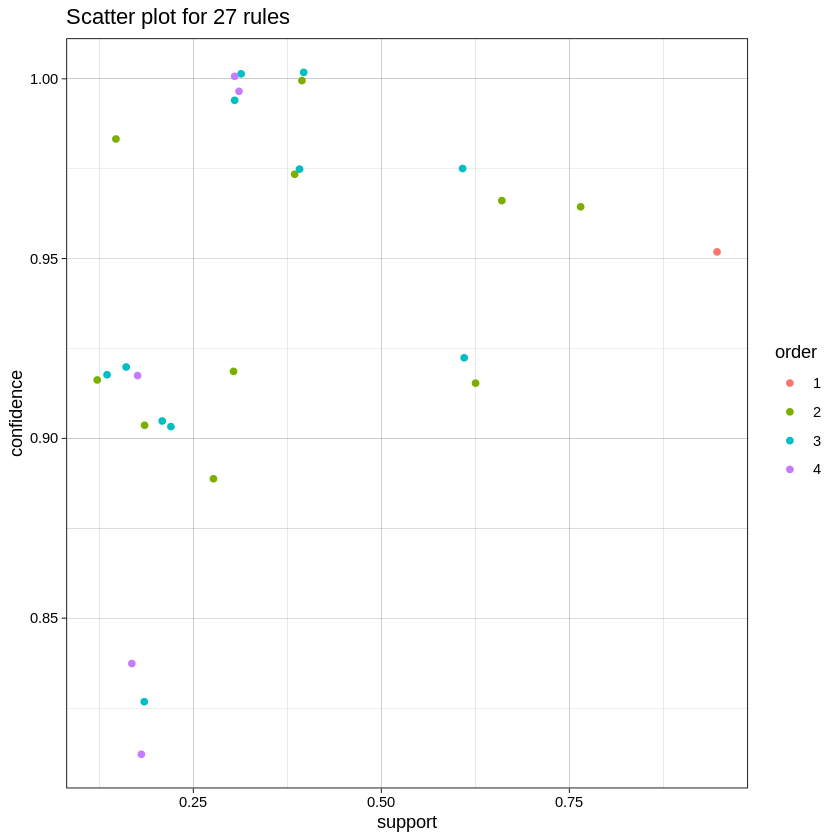

In [11]:
plot(rules.all, shading = "order")  # 규칙 번호에 따라 음영부여(order 번호가 클수록 규칙번호가 큼)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



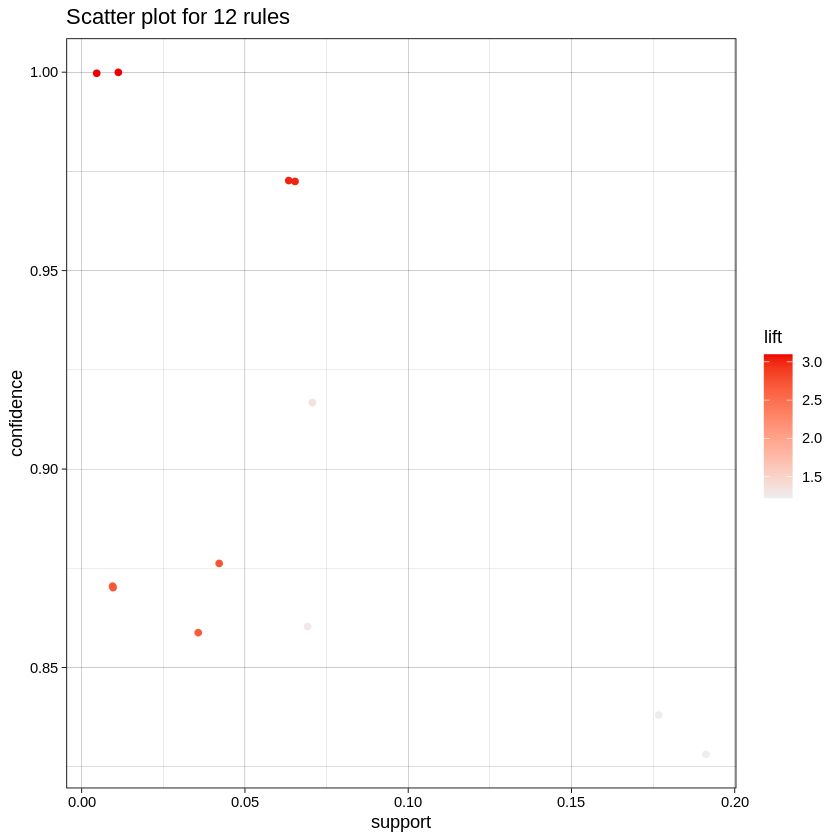

In [13]:
plot(rules.sorted)  # 12개 규칙

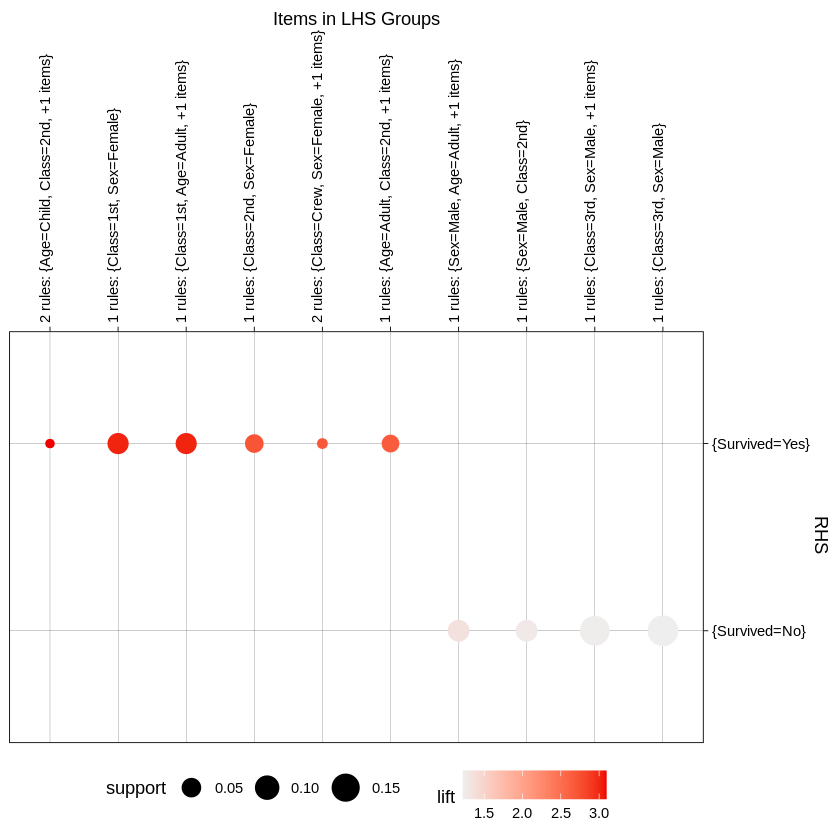

In [14]:
plot(rules.sorted, method = "grouped")

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


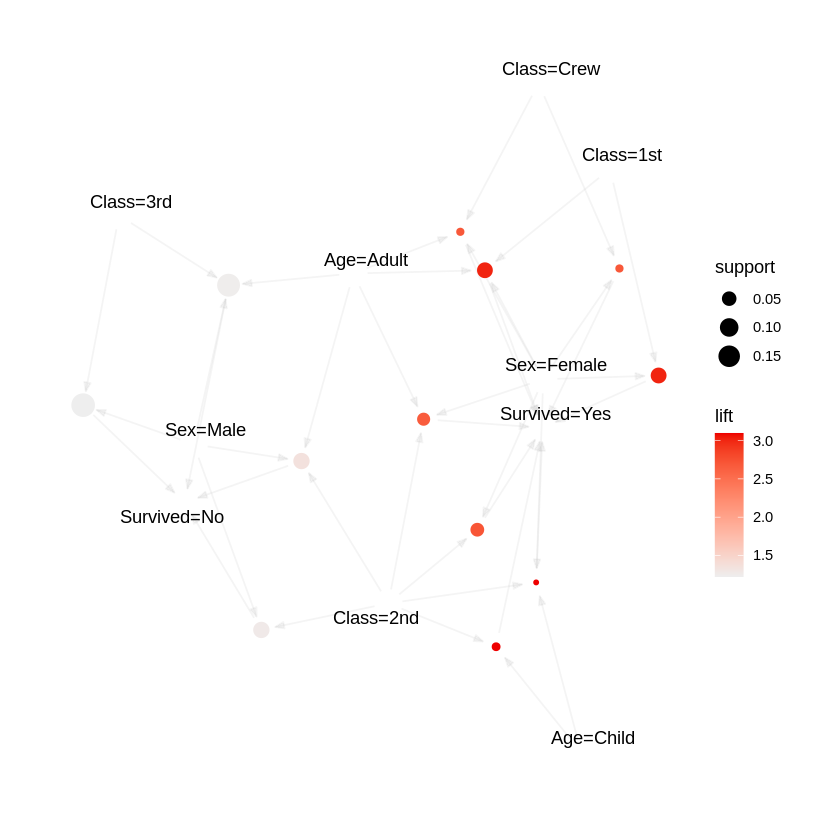

In [15]:
plot(rules.sorted, method = "graph", control = list(type = "items"))  # item = 변수별 범주 수의 합, 10개(4+2+2+2)

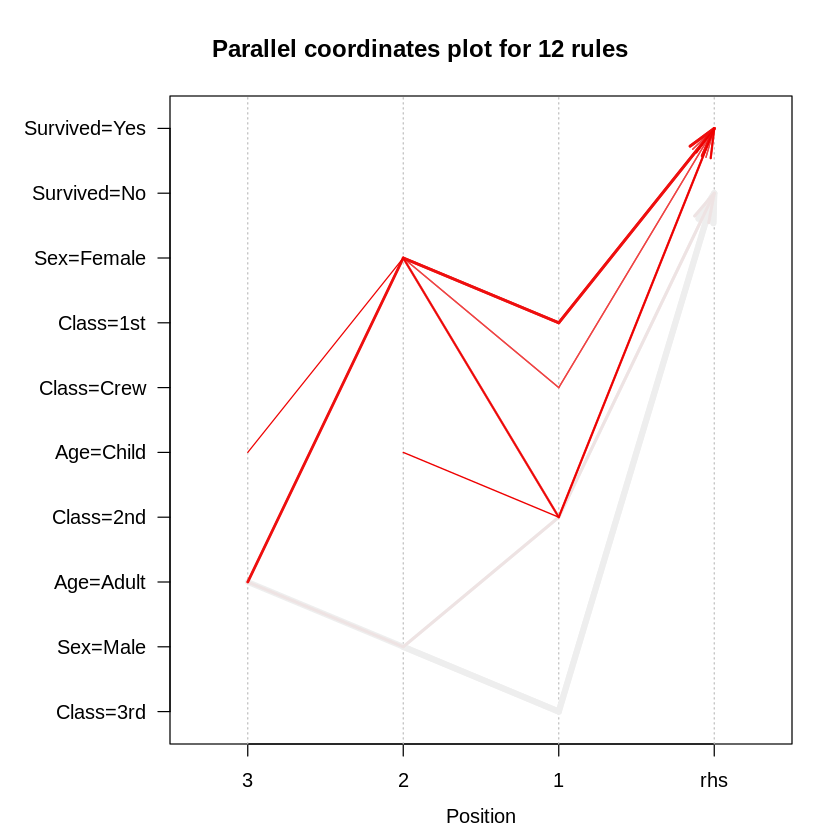

In [16]:
plot(rules.sorted, method = "paracoord", control = list(reorder = TRUE))  # 평행좌표그램

Warning message in plot.rules(rules.sorted, measure = c("support", "lift"), shading = "confidence", :
“The parameter interactive is deprecated. Use engine='interactive' instead.”
To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



Interactive mode.
Select a region with two clicks!


ERROR: ignored

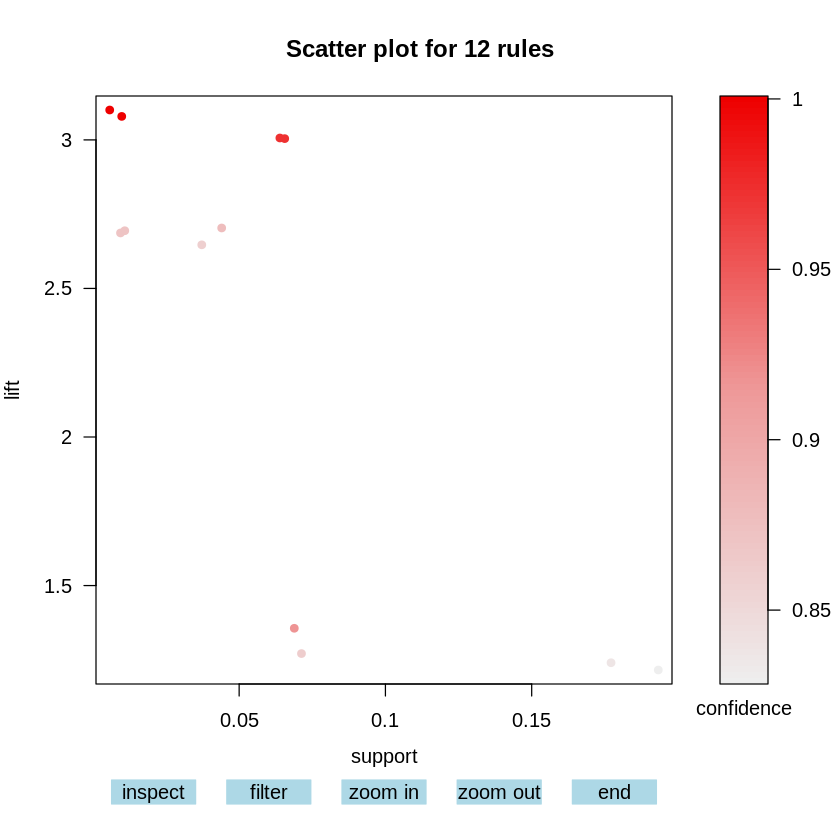

In [17]:
plot(rules.sorted, measure = c("support", "lift"), shading = "confidence", interactive = TRUE)  # 대화식그림

Itemsets in Antecedent (LHS)
 [1] "{Class=2nd,Age=Child}"             "{Class=2nd,Sex=Female,Age=Child}" 
 [3] "{Class=1st,Sex=Female}"            "{Class=1st,Sex=Female,Age=Adult}" 
 [5] "{Class=2nd,Sex=Female}"            "{Class=Crew,Sex=Female}"          
 [7] "{Class=Crew,Sex=Female,Age=Adult}" "{Class=2nd,Sex=Female,Age=Adult}" 
 [9] "{Class=2nd,Sex=Male,Age=Adult}"    "{Class=2nd,Sex=Male}"             
[11] "{Class=3rd,Sex=Male,Age=Adult}"    "{Class=3rd,Sex=Male}"             
Itemsets in Consequent (RHS)
[1] "{Survived=No}"  "{Survived=Yes}"


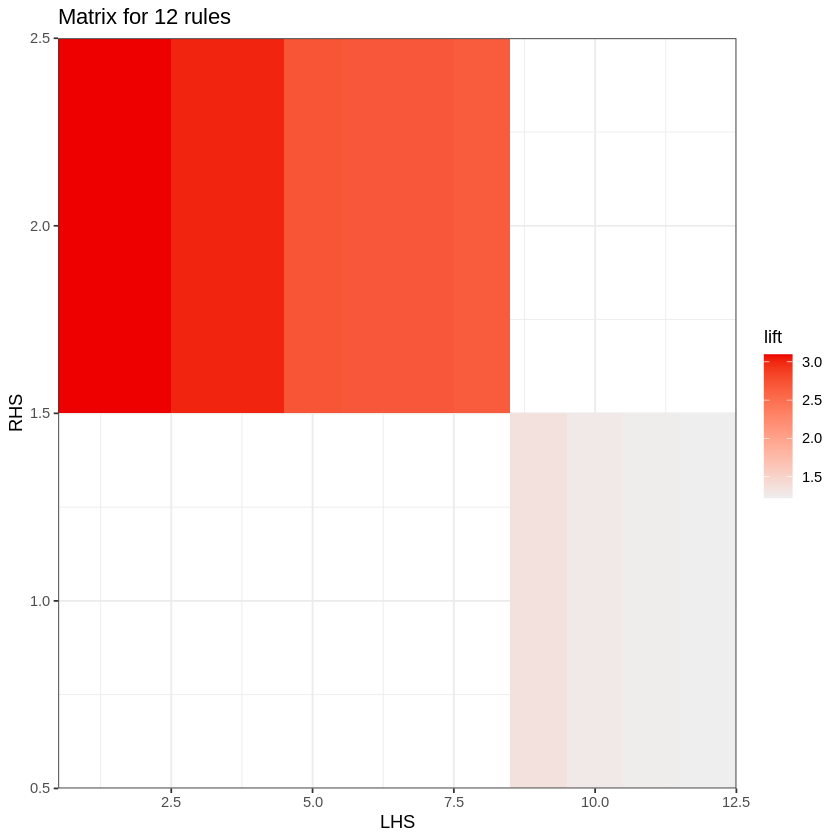

In [18]:
plot(rules.sorted, method = "matrix", measure = "lift")  # 행렬-기반 시각화